In [6]:
# What time range does your data cover?  How many rows are there total?
import time
import csv
import os, sys
from datetime import datetime
start = time.time()
i = 0
latest = 0
with open('trip_data_11.csv','r') as f:
    for line in f:
        i = i + 1
print "Amount of rows: %i" % i
print "Query Time: ", str(time.time()-start)

Amount of rows: 14388452
Query Time:  6.30900001526


In [14]:
i = 0
pickup = []
dropoff = []
start = time.time()
with open('trip_data_11.csv','r') as f:
    reader = csv.reader(f)
    next(reader)
    for line in reader:
        i = i + 1
        pickup.append(line[5])
        dropoff.append(line[6])
        if i > 150000000:
            break
print "Earliest Pickup: ", min(pickup), " Latest Pickup: ", max(pickup)
print "Earliest Dropoff: ", min(dropoff), " Latest Dropoff: ", max(dropoff)
print "Amount of Rows (sans header): ", len(pickup)
print "Query Time: ", str(time.time() - start)

Earliest Pickup:  2013-11-01 00:00:00  Latest Pickup:  2013-11-30 23:59:59
Earliest Dropoff:  2013-11-01 00:00:07  Latest Dropoff:  2013-12-01 01:47:54
Amount of Rows (sans header):  14388451
Query Time:  34.8220000267


In [9]:
# What are the field names?
with open('trip_data_11.csv','r') as f:
    reader = csv.reader(f)
    fieldNames = next(reader)
    print fieldNames

['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']


In [29]:
# Give some sample data for each field.
with open('trip_data_11.csv','r') as f:
    reader = csv.reader(f)
    for i, line in enumerate(reader):
        print i, line
        if i > 2:
            break

0 ['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude']
1 ['E9A54865CAF737ED003957478C9D8FA1', '912A2B86F30CDFE246586972A892367E', 'CMT', '1', 'N', '2013-11-25 15:53:33', '2013-11-25 16:00:51', '1', '437', '.60', '-73.978104', '40.752968', '-73.985756', '40.762684']
2 ['43D85E4D101135DDFC1BC16DF53665FE', 'B2981CEA18FB7E9D8E676EF228257AD1', 'CMT', '1', 'N', '2013-11-25 15:24:41', '2013-11-25 15:30:18', '1', '336', '.50', '-73.982315', '40.764828', '-73.982132', '40.758888']
3 ['70166F37A5CC66D9A35366764ACC40DC', '1BAF0067863EA446E21314F88A600B4D', 'CMT', '1', 'N', '2013-11-25 09:43:42', '2013-11-25 10:02:57', '1', '1154', '3.30', '-73.98201', '40.762508', '-74.006851', '40.719582']


In [27]:
# What MySQL data types would you need to store each of the fields?
#0 ' medallion',E9A54865CAF737ED003957478C9D8FA1, VARCHAR(50),
#1 ' hack_license',912A2B86F30CDFE246586972A892367E, VARCHAR(50) 
#2 ' vendor_id',CMT, VARCHAR(10)
#3 ' rate_code',1, INT(3)
#4 ' store_and_fwd_flag',N, CHAR(3)
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
#8 ' trip_time_in_secs',437, INT(10)
#9 ' trip_distance',.60, DECIMAL(5,2) 
#10 ' pickup_longitude',-73.978104, DECIMAL(9,6)
#11 ' pickup_latitude',40.752968,  DECIMAL(9,6)
#12 ' dropoff_longitude',-73.985756,  DECIMAL(9,6) 
#13 ' dropoff_latitude',40.762684,  DECIMAL(9,6)

In [3]:
# What is the geographic range of your data (min/max - X/Y)?
# Plot this approximately on a map
# https://en.wikipedia.org/wiki/List_of_extreme_points_of_U.S._states
# 10 ' pickup_longitude',
# 11 ' pickup_latitude',
# 12 ' dropoff_longitude',
# 13 ' dropoff_latitude' 
# maxLat = 45.01
# minLat = 40.50
# maxLong = -71.86
# minLong = -79.76
def findMaxCoord(data,row,minValue,maxValue): # chose file, chose row, select max, min
    start = time.time()
    stringErrors = 0.0 #string error counter
    maxErrors  = 0.0 #value error counter
    n = 0.0
    local = minValue
    with open(data,"rb") as f:
        reader = csv.reader(f)
        title = next(reader)
        title = title[row] # skip headers
        for i, line in enumerate(reader):
            try:
                x = float(line[row])
            except ValueError,e:
                stringErrors = stringErrors + 1
            if x > maxValue:
                maxErrors = maxErrors + 1
                pass
            elif x > local:
                local = x 
            if n > 15000000:
                break
            n = n + 1
    print "MAXIMUM: ", title
    #print "Time: ", str(time.time()-start)
    print "String Errors: ", stringErrors, " Values out of Range: ", maxErrors, " Perc. Rows Excluded: ", ((stringErrors + maxErrors)/n)*100, "%"
    #print "Total Rows: ", n
    return local

def findMinCoord(data,row,minValue,maxValue): # chose file, chose row, select max, min
    start = time.time()
    stringErrors = 0.0 #string error counter
    minErrors  = 0.0 #value error counter
    n = 0.0
    local = maxValue
    with open(data,"rb") as f:
        reader = csv.reader(f)
        title = next(reader)
        title = title[row] # skip headers
        for i, line in enumerate(reader):
            try:
                x = float(line[row])
            except ValueError,e:
                stringErrors = stringErrors + 1
            if x < minValue:
                minErrors = minErrors + 1
                pass
            elif x < local:
                local = x 
            if n > 15000000:
                break
            n = n + 1
    #print "Time: ", str(time.time()-start)
    print "minimum: ", title
    print "String Errors: ", stringErrors, " Values out of Range: ", minErrors, " Perc. Rows Excluded: ", ((stringErrors + minErrors)/n)*100, "%"
    #print "Total Rows: ", n
    return local

# max_pickup_latitude = findMaxCoord('trip_data_11.csv',11,40.50,45.01)
# print max_pickup_latitude
# min_pickup_latitude = findMinCoord('trip_data_11.csv',11,40.50,45.01)
# print min_pickup_latitude

In [42]:
# 10 ' pickup_longitude',
# 11 ' pickup_latitude',
# 12 ' dropoff_longitude',
# 13 ' dropoff_latitude' 
# max_pickup_longitude = findMaxCoord('trip_data_11.csv',10,-168.30,-55.50)
# max_pickup_latitude = findMaxCoord('trip_data_11.csv',11,7.0,72.0)

def findMaxMatch(data,row,row_comp,minValue,maxValue): # chose file, chose row, select max, min
    start = time.time()
    stringErrors = 0.0 #string error counter
    maxErrors  = 0.0 #value error counter
    n = 0.0
    local = minValue
    comp = 0
    with open(data,"rb") as f:
        reader = csv.reader(f)
        title = next(reader)
        title = title[row] # skip headers
        for i, line in enumerate(reader):
            try:
                x = float(line[row])
                y = float(line[row_comp])
            except ValueError,e:
                stringErrors = stringErrors + 1
            if x > maxValue:
                maxErrors = maxErrors + 1
                pass
            elif x > local:
                local = x 
                comp = y
            if n > 15000000:
                break
            n = n + 1
    print "MAXIMUM: ", title
    #print "Time: ", str(time.time()-start)
    print "String Errors: ", stringErrors, " Values out of Range: ", maxErrors, " Perc. Rows Excluded: ", ((stringErrors + maxErrors)/n)*100, "%"
    #print "Total Rows: ", n
    return local, comp

def findMinMatch(data,row,row_comp,minValue,maxValue): # chose file, chose row, select max, min
    start = time.time()
    stringErrors = 0.0 #string error counter
    minErrors  = 0.0 #value error counter
    n = 0.0
    local = minValue
    comp = 0
    with open(data,"rb") as f:
        reader = csv.reader(f)
        title = next(reader)
        title = title[row] # skip headers
        for i, line in enumerate(reader):
            try:
                x = float(line[row])
                y = float(line[row_comp])
            except ValueError,e:
                stringErrors = stringErrors + 1
            if x < minValue:
                minErrors = minErrors + 1
                pass
            elif x < local:
                local = x
                comp = y
            if n > 15000000:
                break
            n = n + 1
    #print "Time: ", str(time.time()-start)
    print "minimum: ", title
    print "String Errors: ", stringErrors, " Values out of Range: ", minErrors, " Perc. Rows Excluded: ", ((stringErrors + minErrors)/n)*100, "%"
    #print "Total Rows: ", n
    return local, comp

pickup_longitude_max = findMaxMatch('trip_data_11.csv',10,11,-168.30,-55.50)
pickup_longitude_min = findMinMatch('trip_data_11.csv',10,11,-168.30,-55.50)
pickup_latitude_max = findMaxMatch('trip_data_11.csv',11,10,7.0,72.0)
pickup_latitude_min = findMinMatch('trip_data_11.csv',11,10,7.0,72.0)
dropoff_longitude_max = findMaxMatch('trip_data_11.csv',12,13,-168.30,-55.50)
dropoff_longitude_min = findMinMatch('trip_data_11.csv',12,13,-168.30,-55.50)
dropoff_latitude_max = findMaxMatch('trip_data_11.csv',13,12,7.0,72.0)
dropoff_latitude_min = findMinMatch('trip_data_11.csv',13,12,7.0,72.0)

 MAXIMUM:   pickup_longitude
String Errors:  0.0  Values out of Range:  273800.0  Perc. Rows Excluded:  1.90291505319 %
minimum:   pickup_longitude
String Errors:  0.0  Values out of Range:  43.0  Perc. Rows Excluded:  0.000298850793598 %
MAXIMUM:   pickup_latitude
String Errors:  0.0  Values out of Range:  1.0  Perc. Rows Excluded:  6.95001845577e-06 %
minimum:   pickup_latitude
String Errors:  0.0  Values out of Range:  273842.0  Perc. Rows Excluded:  1.90320695397 %
MAXIMUM:   dropoff_longitude
String Errors:  754.0  Values out of Range:  282884.0  Perc. Rows Excluded:  1.97128933476 %
MAXIMUM:   dropoff_longitude
String Errors:  754.0  Values out of Range:  282884.0  Perc. Rows Excluded:  1.97128933476 %
minimum:   dropoff_latitude
String Errors:  754.0  Values out of Range:  282912.0  Perc. Rows Excluded:  1.97148393528 %
minimum:   dropoff_latitude
String Errors:  754.0  Values out of Range:  282912.0  Perc. Rows Excluded:  1.97148393528 %


In [44]:
dropoff_longitude_min = findMinMatch('trip_data_11.csv',12,13,-168.30,-55.50)
dropoff_latitude_max = findMaxMatch('trip_data_11.csv',13,12,7.0,72.0)

print pickup_longitude_max 
print pickup_longitude_min
print pickup_latitude_max 
print pickup_latitude_min 
print dropoff_longitude_max 
print dropoff_longitude_min 
print dropoff_latitude_max 
print dropoff_latitude_min 

minimum:   dropoff_longitude
String Errors:  754.0  Values out of Range:  43.0  Perc. Rows Excluded:  0.00553916470925 %
MAXIMUM:   dropoff_latitude
String Errors:  754.0  Values out of Range:  2.0  Perc. Rows Excluded:  0.00525421395257 %
(-56.633026, 33.093407)
(-168.3, 0)
(64.870567, -2.9665699)
(7.0, 0)
(-56.099979, 42.283688)
(-168.3, 0)
(64.445435, -11.044415)
(7.0, 0)


In [47]:
# 10 ' pickup_longitude',
# 11 ' pickup_latitude',
# 12 ' dropoff_longitude',
# 13 ' dropoff_latitude' 
# maxLat = 45.01
# minLat = 40.50
# maxLong = -71.86
# minLong = -79.76

x = []
y = []
xx = []
yy = []
max_pickup_longitude = findMaxCoord('trip_data_11.csv',10,-79.76,-71.86)
x.append(max_pickup_longitude)
max_pickup_latitude = findMaxCoord('trip_data_11.csv',11,40.50,45.01)
y.append(max_pickup_latitude)
max_dropoff_longitude = findMaxCoord('trip_data_11.csv',12,-79.76,-71.86)
x.append(max_dropoff_longitude)
max_dropoff_latitude = findMaxCoord('trip_data_11.csv',13,40.50,45.01)
y.append(max_dropoff_latitude)
min_pickup_longitude = findMinCoord('trip_data_11.csv',10,-79.76,-71.86)
x.append(min_pickup_longitude)
min_pickup_latitude = findMinCoord('trip_data_11.csv',11,40.50,45.01)
y.append(min_pickup_latitude)
min_dropoff_longitude = findMinCoord('trip_data_11.csv',12,-79.76,-71.86)
x.append(min_dropoff_longitude)
min_dropoff_latitude = findMinCoord('trip_data_11.csv',13,40.50,45.01)
y.append(min_dropoff_latitude)

xx.append(min(x))
xx.append(max(x))
yy.append(min(y))
yy.append(max(y))
xx.sort()
yy.sort()
print xx
print yy

MAXIMUM:   pickup_longitude
String Errors:  0.0  Values out of Range:  273946.0
Percentage of Rows Excluded:  1.90392975589 %  Perc. Rows Excluded:  1.90392975589 %
MAXIMUM:   pickup_latitude
String Errors:  0.0  Values out of Range:  101.0
Percentage of Rows Excluded:  0.000701951864033 %  Perc. Rows Excluded:  0.000701951864033 %
MAXIMUM:   dropoff_longitude
String Errors:  754.0  Values out of Range:  283027.0
Percentage of Rows Excluded:  1.9722831874 %  Perc. Rows Excluded:  1.9722831874 %
MAXIMUM:   dropoff_latitude
String Errors:  754.0  Values out of Range:  100.0
Percentage of Rows Excluded:  0.00593531576123 %  Perc. Rows Excluded:  0.00593531576123 %
MINIMUM   pickup_longitude
String Errors:  0.0  Values out of Range:  148.0  Perc. Rows Excluded:  0.00102860273145 %
MINIMUM   pickup_latitude
String Errors:  0.0  Values out of Range:  274239.0  Perc. Rows Excluded:  1.90596611129 %
MINIMUM   dropoff_longitude
String Errors:  754.0  Values out of Range:  151.0  Perc. Rows Excl

In [48]:
# since the above is wrong, we'll use the boundaries of continental north america

# Northernmost point — Zenith Point, Canada 72°0′0″N 94°38′59″W.
# Southernmost point — Punta Mariato, Panama 7°12′32″N 80°53′10″W.
# Westernmost point — Cape Prince of Wales, Alaska 65°35′47″N 168°5′5″W.
# Easternmost point — Cape Saint Charles, Labrador 52°13′3″N 55°37′15″W.

x = []
y = []
xx = []
yy = []
max_pickup_longitude = findMaxCoord('trip_data_11.csv',10,-168.30,-55.50)
x.append(max_pickup_longitude)
max_pickup_latitude = findMaxCoord('trip_data_11.csv',11,7.0,72.0)
y.append(max_pickup_latitude)
max_dropoff_longitude = findMaxCoord('trip_data_11.csv',12,-168.30,-55.50)
x.append(max_dropoff_longitude)
max_dropoff_latitude = findMaxCoord('trip_data_11.csv',13,7.0,72.0)
y.append(max_dropoff_latitude)
min_pickup_longitude = findMinCoord('trip_data_11.csv',10,-168.30,-55.50)
x.append(min_pickup_longitude)
min_pickup_latitude = findMinCoord('trip_data_11.csv',11,7.0,72.0)
y.append(min_pickup_latitude)
min_dropoff_longitude = findMinCoord('trip_data_11.csv',12,-168.30,-55.50)
x.append(min_dropoff_longitude)
min_dropoff_latitude = findMinCoord('trip_data_11.csv',13,7.0,72.0)
y.append(min_dropoff_latitude)

xx.append(min(x))
xx.append(max(x))
yy.append(min(y))
yy.append(max(y))
xx.sort()
yy.sort()
print xx
print yy

MAXIMUM:   pickup_longitude
String Errors:  0.0  Values out of Range:  273800.0
Percentage of Rows Excluded:  1.90291505319 %  Perc. Rows Excluded:  1.90291505319 %
MAXIMUM:   pickup_latitude
String Errors:  0.0  Values out of Range:  1.0
Percentage of Rows Excluded:  6.95001845577e-06 %  Perc. Rows Excluded:  6.95001845577e-06 %
MAXIMUM:   dropoff_longitude
String Errors:  754.0  Values out of Range:  282884.0
Percentage of Rows Excluded:  1.97128933476 %  Perc. Rows Excluded:  1.97128933476 %
MAXIMUM:   dropoff_latitude
String Errors:  754.0  Values out of Range:  2.0
Percentage of Rows Excluded:  0.00525421395257 %  Perc. Rows Excluded:  0.00525421395257 %
MINIMUM   pickup_longitude
String Errors:  0.0  Values out of Range:  43.0  Perc. Rows Excluded:  0.000298850793598 %
MINIMUM   pickup_latitude
String Errors:  0.0  Values out of Range:  273842.0  Perc. Rows Excluded:  1.90320695397 %
MINIMUM   dropoff_longitude
String Errors:  754.0  Values out of Range:  43.0  Perc. Rows Exclude

In [25]:
# What is the geographic range of your data (min/max - X/Y)?
# using the tool: https://www.darrinward.com/lat-long/?id=3279557
print xx
print yy
# 40.500011,-71.863335
# 40.500011,-79.735291
# 44.986397,-71.863335
# 44.986397,-79.735291
# 7.7511501,-56.099979
# 7.7511501,-117.47642
# 64.870567,-56.099979
# 64.870567,-117.47642

[-79.735291, -71.863335]
[40.500011, 44.986397]


In [58]:
import sys
sys.executable

'C:\\Users\\harrison\\Anaconda2\\python.exe'

In [ ]:
# What are the distinct values for each field?
#0 ' medallion',E9A54865CAF737ED003957478C9D8FA1, VARCHAR(50),
#1 ' hack_license',912A2B86F30CDFE246586972A892367E, VARCHAR(50) 
#2 ' vendor_id',CMT, VARCHAR(10)
#3 ' rate_code',1, INT(3)
#4 ' store_and_fwd_flag',N, CHAR(3)
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
#8 ' trip_time_in_secs',437, INT(10)
#9 ' trip_distance',.60, DECIMAL(5,2) 
#10 ' pickup_longitude',-73.978104, DECIMAL(9,6)
#11 ' pickup_latitude',40.752968,  DECIMAL(9,6)
#12 ' dropoff_longitude',-73.985756,  DECIMAL(9,6) 
#13 ' dropoff_latitude',40.762684,  DECIMAL(9,6)

##########
# This code will go through, row by row, and append to a dictionary corresponding to each column in the row
# Unfortunately, this code does not work for high-cardinality columns, and it's much much easier
# To just read through each column
# But I couldn't just throw this away. Maybe I'll use it in the future.
##########


# import time
# import csv
# import os, sys
# import plotly.plotly as py
# import pandas as pd

# start = time.time()

with open('trip_data_11.csv','r') as f:
    reader = csv.reader(f)
    fieldNames = next(reader)
    dictlist = [dict() for x in fieldNames]
    for i, line in enumerate(reader):
        if i % 1000 == 0:
            print i,line
        for row in line:
            #print line.index(row), row
            if row in  dictlist[line.index(row)].keys():
                dictlist[line.index(row)][row] += 1
            else:
                dictlist[line.index(row)][row] = 1
        if i > 5000:
            break

# print dictlist
# print fieldNames
# for i in dictlist:
#     print fieldNames[dictlist.index(i)], len(i)

# print "time: ", str(time.time()-start)


In [50]:
# What are the distinct values for each field?
#0 ' medallion',E9A54865CAF737ED003957478C9D8FA1, VARCHAR(50),
#1 ' hack_license',912A2B86F30CDFE246586972A892367E, VARCHAR(50) 
#2 ' vendor_id',CMT, VARCHAR(10)
#3 ' rate_code',1, INT(3)
#4 ' store_and_fwd_flag',N, CHAR(3)
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
#8 ' trip_time_in_secs',437, INT(10)
#9 ' trip_distance',.60, DECIMAL(5,2) 
#10 ' pickup_longitude',-73.978104, DECIMAL(9,6)
#11 ' pickup_latitude',40.752968,  DECIMAL(9,6)
#12 ' dropoff_longitude',-73.985756,  DECIMAL(9,6) 
#13 ' dropoff_latitude',40.762684,  DECIMAL(9,6)

# What are the distinct values for each field?
import time
import csv
# import os, sys
# import pandas as pd

start = time.time()

def cardinality(data,row,threshold):
    dict = {}
    with open(data,"rb") as f:
        reader = csv.reader(f)
        title = next(reader)
        title = title[row] # skip headers
        for i, line in enumerate(reader):
            if line[row] in dict.keys():
                dict[line[row]] = dict[line[row]] + 1
            else:
                dict[line[row]] = 1
            if i % 10000 == 0:
                if len(dict) > threshold:
                    print "OVER THRESHOLD"
                    break
            if i > 15000000:
                break
    print "Column: ", title
    return dict

# print len(cardinality('trip_data_11.csv',0,1000))

for i in range(14):
    x = cardinality('trip_data_11.csv',i,1000)
    if len(x) < 100:
        print "Cardinality:", len(x), x.keys()
    else:
        print "Cardinality over 100: ", len(x)
            
    

OVER THRESHOLD
Column:  medallion
Cardinality over 100:  5275
OVER THRESHOLD
Column:   hack_license
Cardinality over 100:  5601
Column:   vendor_id
Cardinality: 2 ['VTS', 'CMT']
Column:   rate_code
Cardinality: 12 ['10', '210', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8']
Column:   store_and_fwd_flag
Cardinality: 3 ['Y', '', 'N']
OVER THRESHOLD
Column:   pickup_datetime
Cardinality over 100:  1069
OVER THRESHOLD
Column:   dropoff_datetime
Cardinality over 100:  1025
Column:   passenger_count
Cardinality: 11 ['208', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8']
OVER THRESHOLD
Column:   trip_time_in_secs
Cardinality over 100:  1037
OVER THRESHOLD
Column:   trip_distance
Cardinality over 100:  1276
OVER THRESHOLD
Column:   pickup_longitude
Cardinality over 100:  5746
OVER THRESHOLD
Column:   pickup_latitude
Cardinality over 100:  7615
OVER THRESHOLD
Column:   dropoff_longitude
Cardinality over 100:  6112
OVER THRESHOLD
Column:   dropoff_latitude
Cardinality over 100:  8117


In [18]:
# For the other numeric types beside lat and lon, what are the min and max values
#0 ' medallion',E9A54865CAF737ED003957478C9D8FA1, VARCHAR(50),
#1 ' hack_license',912A2B86F30CDFE246586972A892367E, VARCHAR(50) 
#2 ' vendor_id',CMT, VARCHAR(10)
#3 ' rate_code',1, INT(3)
#4 ' store_and_fwd_flag',N, CHAR(3)
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
#8 ' trip_time_in_secs',437, INT(10)
#9 ' trip_distance',.60, DECIMAL(5,2) 

# Since I defined functions, I can just cheat and reuse them here

max_rate_code = findMaxCoord('trip_data_11.csv',3,-10,500)
min_rate_code = findMinCoord('trip_data_11.csv',3,-10,100)
max_passenger_count = findMaxCoord('trip_data_11.csv',7,0,500)
min_passenger_count = findMinCoord('trip_data_11.csv',7,0,500)
max_trip_time_in_secs = findMaxCoord('trip_data_11.csv',8,0,1000000000)
min_trip_time_in_secs = findMinCoord('trip_data_11.csv',8,0,1000000000)
max_trip_distance = findMaxCoord('trip_data_11.csv',9,-10,10000000)
min_trip_distance = findMinCoord('trip_data_11.csv',9,-10,10000000)




MAXIMUM:   rate_code
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
minimum:   rate_code
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
MAXIMUM:   passenger_count
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
minimum:   passenger_count
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
MAXIMUM:   trip_time_in_secs
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
minimum:   trip_time_in_secs
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
MAXIMUM:   trip_distance
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %
minimum:   trip_distance
String Errors:  0.0  Values out of Range:  0.0  Perc. Rows Excluded:  0.0 %


In [22]:
print 'max_rate_code:', max_rate_code
print 'min_rate_code:', min_rate_code
print 'max_passenger_count:', max_passenger_count
print 'min_passenger_count:', min_passenger_count
print 'max_trip_time_in_secs:', max_trip_time_in_secs
print 'min_trip_time_in_secs:', min_trip_time_in_secs
print 'max_trip_distance:', max_trip_distance 
print 'min_trip_distance:', min_trip_distance 

max_rate_code: 210.0
min_rate_code: 0.0
max_passenger_count: 208.0
min_passenger_count: 0.0
max_trip_time_in_secs: 10800.0
min_trip_time_in_secs: 0.0
max_trip_distance: 100.0
min_trip_distance: 0.0


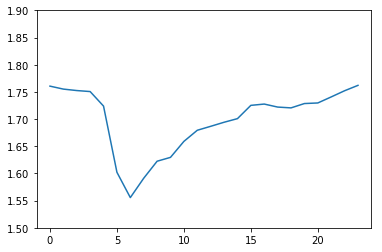

In [29]:
import csv
import os, sys
import matplotlib.pylab as plt

# Create a chart which shows the average number of passengers each hour of the day
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
######################################
# abc = [[1,2,3,4,5],[6,7,8,9,10]]
# for i in range(len(abc)):
#     x = sum(abc[i])/len(abc[i])
#     print x
######################################
with open('trip_data_11.csv','r') as f:
# with open('Taxi000.csv','r') as f:
#     dict = {}
    reader = csv.reader(f)
    fieldNames = next(reader)
    listlist = [list() for x in range(24)]
    for i, line in enumerate(reader):
#         print line
        dt = line[5].split(' ')
        t = dt[1].split(':')
        hour = int(t[0])
#         print hour
        count = float(line[7])
#         print count
        listlist[hour].append(count)
#         if hour in dict.keys():
#             dict[hour] += 1
#         else:
#             dict[hour] = 1
#         print hour
        if i > 15000000:
            break
# print listlist
# print len(dict)
# print dict.keys()
fulldict = {}
for i in range(len(listlist)):
    try:
#         print listlist.index(x), sum(x), len(x), sum(x)/len(x)
        z = sum(listlist[i])/len(listlist[i])
        #print i, z
        fulldict[i] = z
    except ZeroDivisionError, e:
        print e
        pass      
# print fulldict

lists = sorted(fulldict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


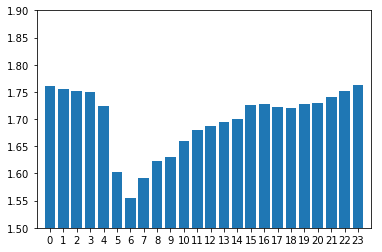

In [30]:
import matplotlib.pyplot as plt
axes = plt.gca()
axes.set_xlim([-1,24])
axes.set_ylim([1.5,1.9])
plt.bar(range(len(fulldict)), fulldict.values(), align='center')
plt.xticks(range(len(fulldict)), fulldict.keys())

plt.show()

In [100]:
testlist = [list() for x in range(5)]
print testlist
for i in range(len(testlist)):
    print i, testlist[i]
#     print testlist.index(i)
    


[[], [], [], [], []]
0 []
1 []
2 []
3 []
4 []


In [31]:
# Create a new CSV file which only one output out of every thousand rows

start = time.time()
c = open('Taxi000.csv','w')
c.write('')
c.close()

c = open('Taxi000.csv','a')

with open('trip_data_11.csv','r') as f:
    for i, line in enumerate(f):
        if i%1000 == 0:
            line = str(line) 
            c.write(line)
#         if i%100000 == 0:
#             print line
c.close()
print "Time: ", str(time.time()-start)


Time:  7.17300009727


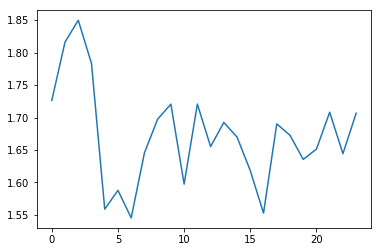

In [32]:
# Repeat step 8 with the reduced dataset and compare the two charts
import csv
import os, sys
import matplotlib.pylab as plt

# Create a chart which shows the average number of passengers each hour of the day
#5 ' pickup_datetime',2013-11-25 15:53:33, TIMESTAMP 
#6 ' dropoff_datetime',2013-11-25 16:00:51, TIMESTAMP 
#7 ' passenger_count',1, INT(2)
######################################
# abc = [[1,2,3,4,5],[6,7,8,9,10]]
# for i in range(len(abc)):
#     x = sum(abc[i])/len(abc[i])
#     print x
######################################

with open('Taxi000.csv','r') as f:
#     dict = {}
    reader = csv.reader(f)
    fieldNames = next(reader)
    listlist = [list() for x in range(24)]
    for i, line in enumerate(reader):
#         print line
        dt = line[5].split(' ')
        t = dt[1].split(':')
        hour = int(t[0])
#         print hour
        count = float(line[7])
#         print count
        listlist[hour].append(count)
#         if hour in dict.keys():
#             dict[hour] += 1
#         else:
#             dict[hour] = 1
#         print hour
        if i > 15000000:
            break
    
# print listlist
# print len(dict)
# print dict.keys()
reduceddict = {}
for i in range(len(listlist)):
    try:
#         print listlist.index(x), sum(x), len(x), sum(x)/len(x)
        z = sum(listlist[i])/len(listlist[i])
        #print i, z
        reduceddict[i] = z
    except ZeroDivisionError, e:
        print e
        pass
        
#print reduceddict

lists = sorted(reduceddict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()


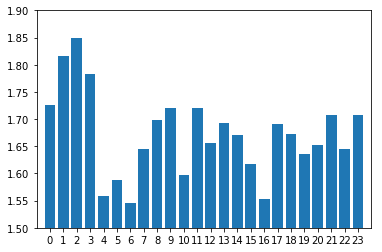

In [27]:
axes = plt.gca()
axes.set_xlim([-1,24])
axes.set_ylim([1.5,1.9])
plt.bar(range(len(reduceddict)), reduceddict.values(), align='center')
plt.xticks(range(len(reduceddict)), reduceddict.keys())

plt.show()